In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
import random
from scipy import stats

warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.decomposition import PCA

In [3]:
# pip install keras

In [4]:
# pip install tensorflow

In [3]:
from xgboost import XGBClassifier
from keras import models
from keras import layers



In [4]:
sampleEntry = pd.read_csv('C:/Users/ankit/Desktop/Hackademy/Notebook/Datasets/sampleEntry.csv')
train = pd.read_csv('C:/Users/ankit/Desktop/Hackademy/Notebook/Datasets/cs-training.csv')
test = pd.read_csv('C:/Users/ankit/Desktop/Hackademy/Notebook/Datasets/cs-test.csv')

In [5]:
train['MonthlyIncome'].fillna(train['MonthlyIncome'].mean(),inplace=True)
train['NumberOfDependents'].fillna(train['NumberOfDependents'].mode()[0], inplace=True)
test['MonthlyIncome'].fillna(test['MonthlyIncome'].mean(),inplace=True)
test['NumberOfDependents'].fillna(test['NumberOfDependents'].mode()[0], inplace=True)

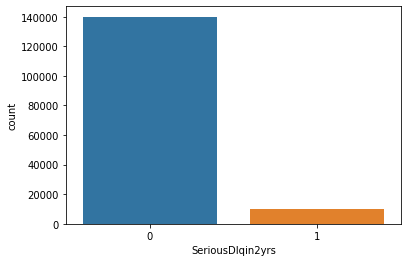

In [6]:
sns.countplot(x='SeriousDlqin2yrs',data=train)
plt.show()

In [128]:
# print("Default Rate: {}%".format(round(train["SeriousDlqin2yrs"].sum()*100 / len(train), 2)))
train.column

AttributeError: 'Series' object has no attribute 'column'

In [7]:
train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [8]:
train_cleaned=train.drop("Unnamed: 0",1)
test_cleaned=test.drop("Unnamed: 0",1)

train_cleaned=train_cleaned.drop("RevolvingUtilizationOfUnsecuredLines",1)
test_cleaned=test_cleaned.drop("RevolvingUtilizationOfUnsecuredLines",1)

train_cleaned=train_cleaned.drop("DebtRatio",1)
test_cleaned=test_cleaned.drop("DebtRatio",1)

train_cleaned=train_cleaned.drop("NumberRealEstateLoansOrLines",1)
test_cleaned=test_cleaned.drop("NumberRealEstateLoansOrLines",1)

train_cleaned=train_cleaned.drop("NumberOfTime60-89DaysPastDueNotWorse",1)
test_cleaned=test_cleaned.drop("NumberOfTime60-89DaysPastDueNotWorse",1)

train_cleaned=train_cleaned.drop("NumberOfDependents",1)
test_cleaned=test_cleaned.drop("NumberOfDependents",1)

train_cleaned=train_cleaned.drop("NumberOfTime30-59DaysPastDueNotWorse",1)
test_cleaned=test_cleaned.drop("NumberOfTime30-59DaysPastDueNotWorse",1)

In [10]:
train_cleaned.describe()

,SeriousDlqin2yrs,age,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate
count,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000
mean,0.066840,52.295207,6.670221e+03,8.452760,0.265973
std,0.249746,14.771866,1.288045e+04,5.145951,4.169304
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,41.000000,3.903000e+03,5.000000,0.000000
50%,0.000000,52.000000,6.600000e+03,8.000000,0.000000
75%,0.000000,63.000000,7.400000e+03,11.000000,0.000000
max,1.000000,109.000000,3.008750e+06,58.000000,98.000000


In [11]:
train_cleaned.head()

,SeriousDlqin2yrs,age,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate
0,1,45,9120.0,13,0
1,0,40,2600.0,4,0
2,0,38,3042.0,2,1
3,0,30,3300.0,5,0
4,0,49,63588.0,7,0


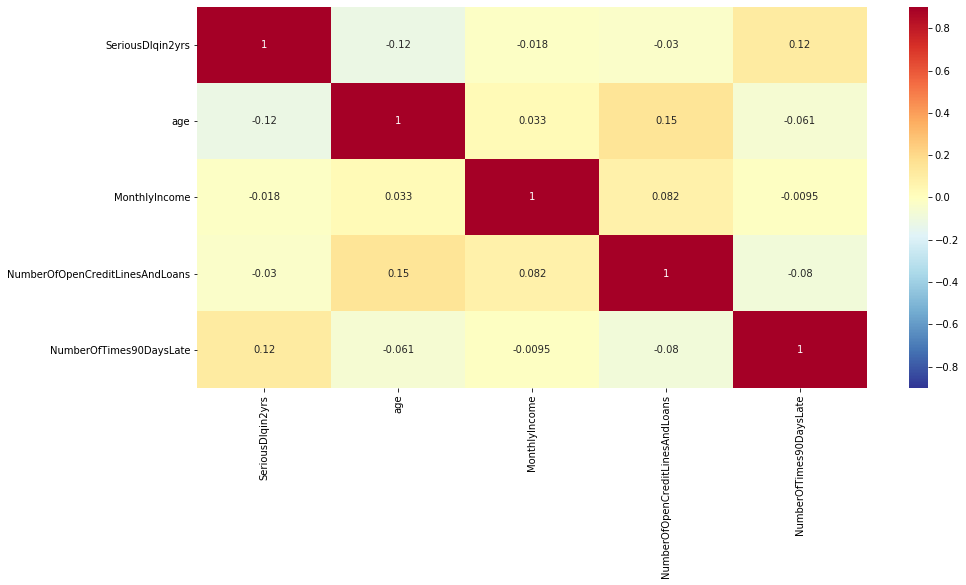

In [9]:
corr_ = train_cleaned.corr()
fig= plt.figure(figsize=(15,7))
sns.heatmap(corr_, cmap = plt.cm.RdYlBu_r, vmin = -0.9, annot = True, vmax = 0.9)

In [10]:
X = train_cleaned.drop('SeriousDlqin2yrs',1)
y = train_cleaned['SeriousDlqin2yrs']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=568)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120000, 4)
(30000, 4)
(120000,)
(30000,)


In [99]:
!pip install imblearn

In [14]:
# pip install --upgrade scikit-learn

In [100]:
# from imblearn.over_sampling import SMOTE
# print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# sm = SMOTE(random_state = 2) 
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
# print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

In [17]:
import sklearn
sklearn.__version__

'0.24.2'

In [18]:
import imblearn
imblearn.__version__

'0.8.0'

In [15]:
# !pip install --upgrade scikit-learn
# !pip install --upgrade imblearn

In [16]:
def model_fit_reports(algo,X_,y_,performCV=True,printFeatureImportance=True, cv_folds=5):
    
    pred = algo.predict(X_)
    accu = accuracy_score(y_, pred)
    f1_  = f1_score(y_, pred)
    rec  = recall_score(y_, pred)
    prec = precision_score(y_, pred)

    
    #GINI & AUC
    fpr, tpr, thresholds = roc_curve(y_, pred)
    roc_auc = auc(fpr, tpr)
    Gini   = 2*roc_auc - 1   
    labels  = ['Accuracy','F1 Score', 'Recall', 'Precision', 'Gini', 'AUC']
    values  = [accu,f1_,rec,prec,Gini,roc_auc]
    
    all_    = pd.Series(values,labels)  
    print(all_)
    all_.plot(kind='bar', title='Model Fit Report')   


    if performCV:
        cv_score = cross_val_score(algo, X_, y_, cv=cv_folds, scoring='roc_auc')
        GINI     = 2 * cv_score -1
        print("AUC : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        print("GINI : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(GINI),np.std(GINI),np.min(GINI),np.max(GINI)))

    cols = list(X_.columns)
    if printFeatureImportance:
        feat_imp = pd.Series(algo.feature_importances_, cols).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')    
    
    return all_

In [18]:
regressor = LogisticRegression(random_state =2, solver='sag', max_iter = 10**2)
regressor.fit(X_train, y_train)

LogisticRegression(random_state=2, solver='sag')

Accuracy     0.933133
F1 Score     0.000000
Recall       0.000000
Precision    0.000000
Gini         0.000000
AUC          0.500000
dtype: float64
AUC : Mean - 0.5799495 | Std - 0.007298782 | Min - 0.5698337 | Max - 0.588603
GINI : Mean - 0.159899 | Std - 0.01459756 | Min - 0.1396675 | Max - 0.177206


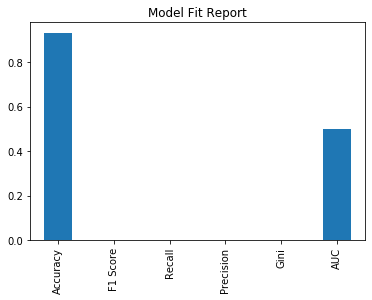

In [19]:
train = model_fit_reports(algo =regressor ,X_ = X_train,y_ = y_train, performCV=True, printFeatureImportance=False, cv_folds=5)

Accuracy     0.933267
F1 Score     0.000000
Recall       0.000000
Precision    0.000000
Gini         0.000000
AUC          0.500000
dtype: float64
AUC : Mean - 0.5889132 | Std - 0.01630574 | Min - 0.5632897 | Max - 0.614183
GINI : Mean - 0.1778264 | Std - 0.03261148 | Min - 0.1265795 | Max - 0.2283661


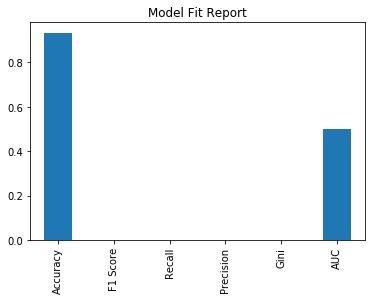

In [25]:
test  = model_fit_reports(algo =regressor ,X_ = X_test,y_ = y_test, performCV=True, printFeatureImportance=False, cv_folds=5)

In [20]:
y_pred=regressor.predict(X_test)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
y_pred=regressor.predict_proba(X_test)
y_pred

array([[0.94559726, 0.05440274],
       [0.98380062, 0.01619938],
       [0.98796694, 0.01203306],
       ...,
       [0.95041153, 0.04958847],
       [0.98727352, 0.01272648],
       [0.93425416, 0.06574584]])

In [24]:
rfc = RandomForestClassifier(random_state=8, n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=8)

Accuracy     0.984300
F1 Score     0.868930
Recall       0.778290
Precision    0.983465
Gini         0.777352
AUC          0.888676
dtype: float64
AUC : Mean - 0.6906553 | Std - 0.009485169 | Min - 0.6806543 | Max - 0.7067297
GINI : Mean - 0.3813106 | Std - 0.01897034 | Min - 0.3613087 | Max - 0.4134595


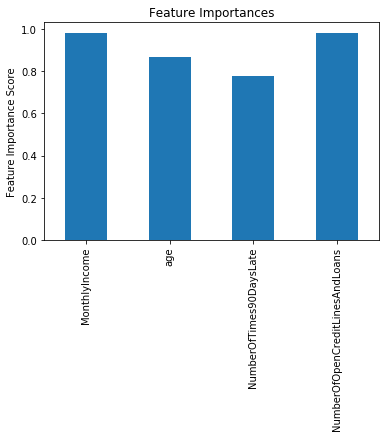

In [26]:
train = model_fit_reports(algo =rfc ,X_ = X_train,y_ = y_train, performCV=True, printFeatureImportance=True, cv_folds=5)

Accuracy     0.924300
F1 Score     0.221460
Recall       0.161339
Precision    0.353005
Gini         0.140194
AUC          0.570097
dtype: float64
AUC : Mean - 0.7108249 | Std - 0.007941718 | Min - 0.6990763 | Max - 0.7235647
GINI : Mean - 0.4216498 | Std - 0.01588344 | Min - 0.3981527 | Max - 0.4471295


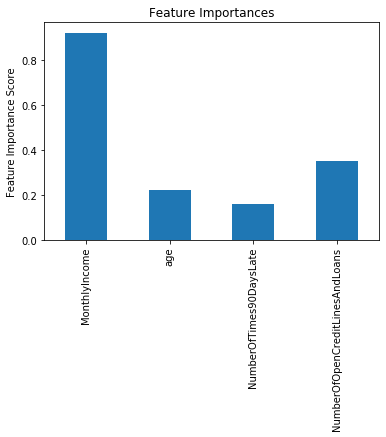

In [27]:
test = model_fit_reports(algo =rfc ,X_ = X_test,y_ = y_test, performCV=True, printFeatureImportance=True, cv_folds=5)

In [29]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

Accuracy     0.936433
F1 Score     0.223850
Recall       0.137089
Precision    0.609756
Gini         0.130802
AUC          0.565401
dtype: float64
AUC : Mean - 0.7598455 | Std - 0.006751376 | Min - 0.7522482 | Max - 0.7693763
GINI : Mean - 0.519691 | Std - 0.01350275 | Min - 0.5044964 | Max - 0.5387526


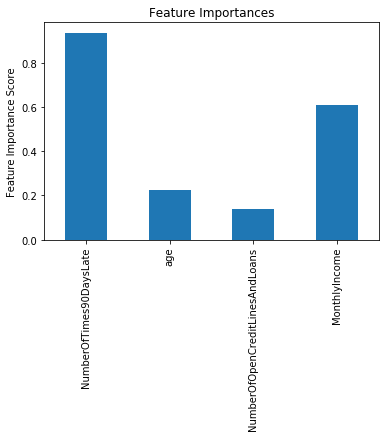

In [33]:
train = model_fit_reports(algo =gbc ,X_ = X_train,y_ = y_train, performCV=True, printFeatureImportance=True, cv_folds=5)

Accuracy     0.935033
F1 Score     0.202210
Recall       0.123377
Precision    0.560091
Gini         0.116448
AUC          0.558224
dtype: float64
AUC : Mean - 0.7621907 | Std - 0.01374327 | Min - 0.7512354 | Max - 0.78864
GINI : Mean - 0.5243814 | Std - 0.02748655 | Min - 0.5024708 | Max - 0.5772799


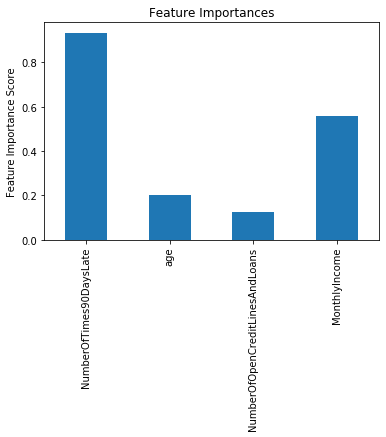

In [32]:
test = model_fit_reports(algo =gbc ,X_ = X_test,y_ = y_test, performCV=True, printFeatureImportance=True, cv_folds=5)

In [52]:
train_cleaned.head(5)

,SeriousDlqin2yrs,age,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate
0,1,45,9120.0,13,0
1,0,40,2600.0,4,0
2,0,38,3042.0,2,1
3,0,30,3300.0,5,0
4,0,49,63588.0,7,0


In [65]:
from array import array
ankit=np.array([28,8000,30,0]).reshape(1,-1)
ankit_prob=rfc.predict_proba(ankit)

In [66]:
ankit_prob[0]

array([0.98466667, 0.01533333])

In [69]:
n_inputs = X_train.shape[1]

model = models.Sequential()
model.add(layers.Dense(16, activation ='relu', input_shape =(n_inputs, )))
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(1,activation ='sigmoid'))

In [70]:
model.compile(optimizer = 'rmsprop',
             loss= 'binary_crossentropy',
             metrics = ['accuracy'])

In [71]:
history = model.fit(X_train,
                   y_train,
                   epochs=150,
                   batch_size=512,
                   validation_data=(X_test,y_test))

Epoch 1/150
235/235 [==============================] - 12s 3ms/step - loss: 24.1586 - accuracy: 0.8916 - val_loss: 2.7883 - val_accuracy: 0.9333
Epoch 2/150
235/235 [==============================] - 0s 1ms/step - loss: 2.6812 - accuracy: 0.8678 - val_loss: 4.7240 - val_accuracy: 0.9333
Epoch 3/150
235/235 [==============================] - 0s 1ms/step - loss: 2.7256 - accuracy: 0.8729 - val_loss: 0.3576 - val_accuracy: 0.8903
Epoch 4/150
235/235 [==============================] - 0s 1ms/step - loss: 2.4410 - accuracy: 0.8658 - val_loss: 0.8353 - val_accuracy: 0.2510
Epoch 5/150
235/235 [==============================] - 0s 1ms/step - loss: 2.3577 - accuracy: 0.8548 - val_loss: 3.9820 - val_accuracy: 0.9333
Epoch 6/150
235/235 [==============================] - 0s 1ms/step - loss: 2.5684 - accuracy: 0.8784 - val_loss: 0.5642 - val_accuracy: 0.9334
Epoch 7/150
235/235 [==============================] - 0s 1ms/step - loss: 2.1692 - accuracy: 0.8754 - val_loss: 2.7417 - val_accuracy: 0.93

In [72]:
score = model.evaluate(X_test, y_test)

938/938 [==============================] - 1s 756us/step - loss: 0.2150 - accuracy: 0.9344


In [73]:
#GINI & AUC 
pred  = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print("The AUC of the Test model is ", roc_auc)
Gini   = 2*roc_auc - 1
print("The Gini of the Test model is ", Gini)

The AUC of the Test model is  0.7456282199120974
The Gini of the Test model is  0.49125643982419476


In [74]:
import pickle

In [125]:
fileName='final_rfc_credit_Model.pkl'
pickle.dump(rfc,open(fileName, 'wb'))

In [83]:
model.save('final_DL_credit_Model.h5')

In [104]:
from array import array
ankit=np.array([28,20000,20,0]).reshape(1,-1)
ankit_prob=rfc.predict_proba(ankit)
print("rfc: ",ankit_prob)
print("gbc: ",gbc.predict_proba(ankit))
print("regressor: ",regressor.predict_proba(ankit))
print("DL: ",model.predict_proba(ankit))

print("rfc: ",rfc.predict(ankit))
print("gbc: ",gbc.predict(ankit))
print("regressor: ",regressor.predict(ankit))
print("DL: ",model.predict(ankit))

rfc:  [[0.85 0.15]]
gbc:  [[0.89809903 0.10190097]]
regressor:  [[9.99808122e-01 1.91878293e-04]]
DL:  [[0.04439619]]
rfc:  [0]
gbc:  [0]
regressor:  [0]
DL:  [[0.04439619]]


In [108]:
with open('final_rfc_credit_model.pkl', 'rb') as pickle_file:
    loaded_model = pickle.load(pickle_file)

In [112]:
loaded_model.predict_proba(ankit)[0][0]

0.85

In [105]:
X_train.columns

Index(['age', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate'],
      dtype='object')

In [115]:
import os
dirname = os.path.dirname('__file__')
filename = os.path.join(dirname, 'final_rfc_credit_model.pkl')

In [117]:
print(filename)

final_rfc_credit_model.pkl


In [119]:
print(os.path.dirname(os.path.realpath(filename)))

C:\Users\ankit\Desktop\Hackademy\Notebook


In [122]:
print(os.path.join(dirname, filename))

final_rfc_credit_model.pkl


In [123]:
path_rel=os.path.dirname(os.path.realpath(filename))+'\\'+filename

In [124]:
print(path_rel)

C:\Users\ankit\Desktop\Hackademy\Notebook\final_rfc_credit_model.pkl
